# Wifi

In [3]:
import numpy as np
import pandas as pd
import fanalysis
from fanalysis.ca import CA

## Importation des données

In [4]:
dtype = {'Code Site': 'category', 'Nom du site': str, 'Code postal': 'category', "Type d'appareil":'category', 'Nombre de borne': int, 'Adresse': str}

In [5]:
df = pd.read_csv("./data/paris-wi-fi-utilisation-des-hotspots-paris-wi-fi.csv", sep=";", dtype=dtype)

In [6]:
# To limit the size
# df = df.sample(3000)

**Remove duplicate columns**

In [7]:
len(df['Code postal'] == df['Code postal.1'])

1962656

In [8]:
del df['Date heure fin']
del df['Donnée entrante (Octet)']
del df['Donnée sortante (Octet)']
del df['Code postal.1']
del df['Nom du site.1']
del df['Temps de session en secondes']

**Remove useless columns**

**Convert time columns**

In [9]:
# df['Date heure début'] = pd.to_datetime(df['Date heure début'])

## Observation des données

In [10]:
len(df)

1962656

In [11]:
df.columns

Index(['Code Site', 'Date heure début', 'Temps de sessions en minutes',
       'Nom du site', 'Code postal', 'Type d'appareil',
       'Constructeur appareil', 'Version système exploitation',
       'Version navigateur', 'Donnée entrante (MégaOctet)',
       'Donnée sortante (MégaOctet)', 'Paquets entrants', 'Paquets sortants',
       'Langue utilisateur', 'geo_shape', 'geo_point_2d', 'Etat du site',
       'Adresse', 'Nombre de bornes'],
      dtype='object')

In [12]:
df.sample(10)

,Code Site,Date heure début,Temps de sessions en minutes,Nom du site,Code postal,Type d'appareil,Constructeur appareil,Version système exploitation,Version navigateur,Donnée entrante (MégaOctet),Donnée sortante (MégaOctet),Paquets entrants,Paquets sortants,Langue utilisateur,geo_shape,geo_point_2d,Etat du site,Adresse,Nombre de bornes
967084,PW0049,2020-10-17T15:40:00+02:00,5.100000,MED VIOLETTE LEDUC,75011,Ordinateur,autre,Windows 10,Chrome 86.0,28.203639,2.315405,19209,15567,Français,"{""coordinates"": [2.383960071, 48.8515955528], ...","48.8515955528,2.38396007097",Opérationnel,18 RUE FAIDHERBE,4.0
520818,PW0105,2020-02-07T18:43:25+01:00,2.050000,CS LOUIS LUMIERE,75020,Mobile,Apple,iOS 13.3,Safari unknown,2.283320,0.247571,1893,2439,Français,"{""coordinates"": [2.4116456845, 48.8591982131],...","48.8591982131,2.41164568454",Opérationnel,30 RUE LOUIS LUMIERE,1.0
1557600,PW0175,2020-08-22T12:11:00+02:00,15.800000,JARD DU TROCADERO,75016,Mobile,Apple,iOS 13.5.1,Safari unknown,44.005930,19.511361,43833,47372,Anglais,"{""coordinates"": [2.2893499444, 48.8609372147],...","48.8609372147,2.28934994437",Opérationnel,1 PLACE DU ONZE NOVEMBRE 1918,1.0
784753,PW0050,2021-08-27T19:00:55+02:00,74.516667,BIB FORNEY,75004,Mobile,autre,inconnu,Chrome 81.0,3.230036,2.219359,5603,7252,Espagnol,"{""coordinates"": [2.3591792373, 48.853423534], ...","48.853423534,2.35917923727",Opérationnel,1 RUE DU FIGUIER,4.0
160038,PW0044,2020-02-05T15:47:33+01:00,61.833333,BIB MARGUERITE AUDOUX,75003,Ordinateur,Apple,Mac OS X 10.11.6,inconnu,52.660139,3.692094,42166,47282,Français,"{""coordinates"": [2.3598462566, 48.8637689236],...","48.8637689236,2.3598462566",Opérationnel,8-12 RUE PORTEFOIN,2.0
858917,PW0169,2021-06-17T14:20:21+02:00,120.233333,STADE CHARLETY,75013,Mobile,Samsung,inconnu,Chrome 91.0,177.789870,13.194063,136514,117004,Russe,"{""coordinates"": [2.3467016527, 48.819334381], ...","48.819334381,2.34670165273",Opérationnel,99 BOULEVARD KELLERMANN,9.0
1099949,PW0175,2021-04-01T17:49:00+02:00,38.316667,JARD DU TROCADERO,75016,Mobile,Apple,iOS 14.4.1,Safari unknown,30.478287,6.414897,27946,27671,Anglais,"{""coordinates"": [2.2893499444, 48.8609372147],...","48.8609372147,2.28934994437",Opérationnel,1 PLACE DU ONZE NOVEMBRE 1918,1.0
539956,PW0132,2020-11-16T09:42:39+01:00,20.733333,MAIRIE DU 4 EME,75004,Mobile,HUAWEI,inconnu,Chrome 86.0,8.646981,1.288352,6686,7931,Français,"{""coordinates"": [2.3557569011, 48.8562716079],...","48.8562716079,2.35575690111",Opérationnel,2 PLACE BAUDOYER,32.0
1720115,PW0147,2021-08-10T15:36:00+02:00,5.250000,MED FRANCOISE SAGAN,75010,Mobile,autre,inconnu,inconnu,0.004047,0.004741,10,18,Français,"{""coordinates"": [2.353666773, 48.8754298708], ...","48.8754298708,2.35366677297",Opérationnel,8 RUE LEON SCHWARTZENBERG,13.0
809080,PW0152,2021-09-21T11:36:24+02:00,78.583333,SQ JEAN AICARD,75011,Mobile,Apple,iOS 14.7.1,Safari unknown,208.384399,10.496848,148079,129657,Français,"{""coordinates"": [2.381272317, 48.8649086244], ...","48.8649086244,2.38127231697",Opérationnel,5 AVENUE JEAN AICARD,1.0


In [13]:
# df.info()

### Removing rows with missing values

In [14]:
df = df.dropna(how='any')

In [15]:
# df.info()

In [16]:
pd.set_option('display.float_format', lambda x: '%.1f' % x)

In [17]:
# df.describe()

### c. Constructeurs différents

In [18]:
def f(constructeur):
    if constructeur == "autre":
        return "Autre"
    elif constructeur == "other":
        return "Autre"
    else:
        return constructeur

df["Constructeur appareil"] = df['Constructeur appareil'].apply(f)

In [19]:
df['Constructeur appareil'].unique()

array(['HUAWEI', 'Autre', 'Samsung', 'Apple', 'Asus', 'Nokia', 'LG',
       'HTC', 'RIM', 'Sony', 'ARCHOS'], dtype=object)

In [20]:
df['Code postal'].unique()

['75004', '75007', '75016', '75014', '75008', ..., '75006', '75015', '75020', '75017', '92100']
Length: 21
Categories (21, object): ['75001', '75002', '75003', '75004', ..., '75018', '75019', '75020', '92100']

In [21]:
def f(langue):
    if langue == "Chinois simplifié":
        return "Chinois"
    elif langue == "Chinois simplifi‚":
        return "Chinois"
    elif langue == "Chinois traditionnel":
        return "Chinois"
    elif langue == "Français":
        return "Francais"
    elif langue == "Fran‡ais":
        return "Francais"
    elif langue == "Néerlandais":
        return "Neerlandais"
    elif langue == "N‚erlandais":
        return "Neerlandais"
    elif langue == "Cor‚en":
        return "Coreen"
    elif langue == "Coréen":
        return "Coreen"
    elif langue == "Indon‚sien":
        return "Indonesien"
    elif langue == "Indonésien":
        return "Indonesien"
    elif langue == "Tha‹landais":
        return "Thailandais"
    elif langue == "Thaïlandais":
        return "Thailandais"
    else:
        return langue

df['Langue utilisateur'] = df['Langue utilisateur'].apply(f)

In [22]:
df['Langue utilisateur'].unique()

array(['Francais', 'Allemand', 'Anglais', 'Russe', 'Espagnol', 'Arabe',
       'Portugais', 'Thailandais', 'Italien', 'Chinois', 'Coreen',
       'Neerlandais', 'Japonais', 'Polonais', 'Indonesien'], dtype=object)

In [23]:
df_projet = df[['Langue utilisateur', 'Code postal', 'Constructeur appareil']]
print(df_projet.head())

  Langue utilisateur Code postal Constructeur appareil
0           Francais       75004                HUAWEI
1           Allemand       75007                 Autre
2            Anglais       75016               Samsung
3            Anglais       75004               Samsung
4            Anglais       75004                 Apple


In [24]:
tableau1 = pd.crosstab(df_projet['Code postal'], df_projet["Constructeur appareil"])

In [25]:
tableau2 = pd.crosstab(df_projet['Code postal'], df_projet["Langue utilisateur"])
tableau2

Langue utilisateur,Allemand,Anglais,Arabe,Chinois,Coreen,Espagnol,Francais,Indonesien,Italien,Japonais,Neerlandais,Polonais,Portugais,Russe,Thailandais
Code postal,,,,,,,,,,,,,,,
75001,2332,21338,726,742,168,3790,89702,6,1003,365,657,212,1575,2795,37
75002,129,1057,6,26,8,160,11169,0,127,13,20,10,44,52,0
75003,441,5457,11,590,36,533,32694,0,259,68,184,38,340,532,0
75004,5515,42584,1120,1497,548,7942,133246,12,3623,591,1313,604,3422,6467,89
75005,361,5992,249,423,66,875,40284,2,713,312,56,119,467,1315,0
75006,77,2184,5,125,25,186,12798,0,86,86,14,6,97,51,1
75007,2357,19824,155,467,570,5982,25083,39,1037,266,709,282,2905,3113,32
75008,805,9431,35,284,81,1845,26021,3,370,142,243,204,865,1285,1
75009,645,7165,130,366,37,1272,37941,1,379,149,148,160,467,594,5


## AFC
### round 1 : code postal vs langue de l'appareil

In [26]:
df_0 = df_projet.copy()
tableau2 = pd.crosstab(df_0['Code postal'], df_0["Langue utilisateur"])

In [27]:
X = tableau2.to_numpy()
tableau2_ca = CA(row_labels=tableau2.index.values, col_labels=tableau2.columns.values)
tableau2_ca

CA(col_labels=array(['Allemand', 'Anglais', 'Arabe', 'Chinois', 'Coreen', 'Espagnol',
       'Francais', 'Indonesien', 'Italien', 'Japonais', 'Neerlandais',
       'Polonais', 'Portugais', 'Russe', 'Thailandais'], dtype=object),
   row_labels=['75001', '75002', '75003', '75004', '75005', ..., '75017', '75018', '75019', '75020', '92100']
Length: 21
Categories (21, object): ['75001', '75002', '75003', '75004', ..., '75018', '75019', '75020', '92100'])

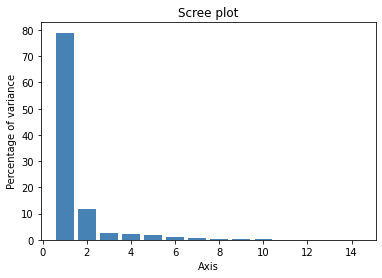

In [28]:
tableau2_ca.fit(X)
# tableau2_ca.plot_eigenvalues()
tableau2_ca.plot_eigenvalues(type="percentage")
# tableau2_ca.plot_eigenvalues(type="cumulative")

In [29]:
# arrondissement en fonction de la langue, poids de chaque composante pour l'arrondissement
df_rows = tableau2_ca.row_topandas()
print(df_rows)

       row_coord_dim1  row_coord_dim2  row_coord_dim3  row_coord_dim4  \
75001            -0.1             0.0             0.0             0.0   
75002             0.2            -0.1            -0.0             0.1   
75003             0.1            -0.0             0.0             0.0   
75004            -0.3             0.0             0.1             0.1   
75005             0.0            -0.0             0.1            -0.1   
75006             0.1            -0.0            -0.1             0.0   
75007            -1.0            -0.1            -0.1             0.0   
75008            -0.4            -0.0             0.0             0.0   
75009            -0.0            -0.0            -0.0             0.0   
75010             0.2            -0.0            -0.0             0.0   
75011             0.2            -0.1             0.1            -0.1   
75012             0.2            -0.1             0.0            -0.0   
75013             0.2            -0.1             0

In [30]:
# Contributions des points lignes
print(tableau2_ca.row_contrib_.round(1))

[[ 1.5  0.2  1.   1.8  1.2  1.   0.2  8.5 15.3  9.2 18.6  0.1  3.3 21.9]
 [ 0.4  0.3  0.1  0.9  1.3  0.   0.7  0.   1.7  0.   0.   0.1  0.   9.8]
 [ 0.1  0.2  0.7  0.4  4.9  1.6  9.4  6.   0.4  5.6  6.2 17.2  0.7  1.1]
 [12.7  0.3 13.6 16.5  0.  11.7  4.7  3.9 14.4  2.2  0.3  0.9  1.5  1.1]
 [ 0.   0.2  2.7  2.6  0.1 19.3  0.3 32.   0.  23.8  2.6  2.6  6.1  0.3]
 [ 0.1  0.   1.2  0.2  0.1  0.2 11.9  0.4  0.3 10.1 12.2  0.2  2.6 10.8]
 [34.7  0.7  8.2  1.5  6.9 10.4 10.2  6.5  8.5  0.1  0.9  0.9  1.4  2.5]
 [ 3.3  0.1  0.   0.5  0.   1.2 25.   0.9  4.1  0.  16.6 16.4  5.3  0.8]
 [ 0.   0.1  0.1  0.1  0.6  2.1  5.4  0.   5.2  3.   1.1 28.4  0.7  8.5]
 [ 1.8  0.2  0.3  3.2  0.4  3.6  4.6  0.5  4.2  1.   8.2  5.7 10.3  0.8]
 [ 1.8  3.3 16.4  5.7  2.7  2.7  0.1  3.1 16.2 11.   1.9  7.  11.6  0. ]
 [ 2.2  1.5  1.2  0.   4.2  0.   8.9 10.   3.1  8.3  0.1  0.1  6.1 11.2]
 [ 2.3  2.1  6.9  9.  23.9  9.5  0.2  1.2  2.6  1.8  0.3  2.9 12.6  0.2]
 [ 0.8  0.8  0.9  8.5  2.1  0.9  2.5 16.5  1.1  8.1

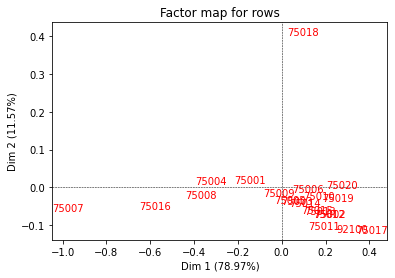

In [31]:
tableau2_ca.mapping_row(num_x_axis=1, num_y_axis=2)

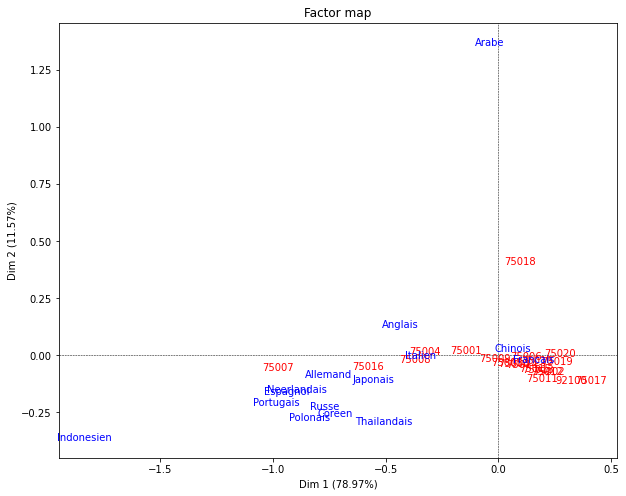

In [32]:
tableau2_ca.mapping(1, 2, figsize=(10, 8))

### round 2 : sans les langues peu représentées et loins sur les axes

In [33]:
df_0.groupby('Langue utilisateur')["Code postal"].count()

Langue utilisateur
Allemand         21316
Anglais         243480
Arabe             8826
Chinois          13552
Coreen            3483
Espagnol         38292
Francais       1362813
Indonesien         185
Italien          15411
Japonais          4263
Neerlandais       5395
Polonais          3694
Portugais        17618
Russe            28243
Thailandais        422
Name: Code postal, dtype: int64

In [34]:
# arabe et indonésien très loin sur les axes
df2 = df_projet.copy()
df2.drop(df2[df2["Langue utilisateur"] == 'Arabe'].index, inplace= True)
df2.drop(df2[df2["Langue utilisateur"] == "Indonesien"].index, inplace=True)
df2.groupby('Langue utilisateur')["Code postal"].count()

Langue utilisateur
Allemand         21316
Anglais         243480
Chinois          13552
Coreen            3483
Espagnol         38292
Francais       1362813
Italien          15411
Japonais          4263
Neerlandais       5395
Polonais          3694
Portugais        17618
Russe            28243
Thailandais        422
Name: Code postal, dtype: int64

et on refait la FA dessus

In [35]:
tableau3 = pd.crosstab(df2['Code postal'], df2["Langue utilisateur"])
X = tableau3.to_numpy()
tableau3_ca = CA(row_labels=tableau3.index.values, col_labels=tableau3.columns.values)
tableau3_ca

CA(col_labels=array(['Allemand', 'Anglais', 'Chinois', 'Coreen', 'Espagnol', 'Francais',
       'Italien', 'Japonais', 'Neerlandais', 'Polonais', 'Portugais',
       'Russe', 'Thailandais'], dtype=object),
   row_labels=['75001', '75002', '75003', '75004', '75005', ..., '75017', '75018', '75019', '75020', '92100']
Length: 21
Categories (21, object): ['75001', '75002', '75003', '75004', ..., '75018', '75019', '75020', '92100'])

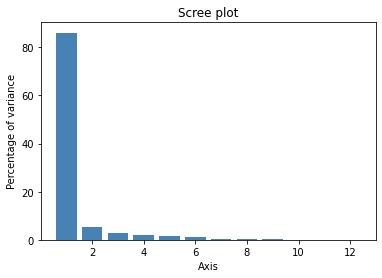

[[ 1.5  0.5  1.3  2.3  0.   1.1  9.2 13.7  9.4 18.   1.6 11.1]
 [ 0.4  0.1  0.1  2.6  0.4  0.   0.   1.8  0.   0.   0.1  1.5]
 [ 0.1  0.3  1.   3.7  0.2  1.7  6.7  0.   8.6 10.7  8.6 11.8]
 [12.8  1.9 16.4  3.6 10.9 13.4  3.3 15.1  3.   0.2  0.   1.1]
 [ 0.   1.9  1.8  0.3  1.6 18.7 32.1  0.  23.2  3.1  4.   3.5]
 [ 0.1  0.9  0.9  0.2  1.2  0.1  0.3  0.  12.1  9.5  0.6  9.2]
 [34.7  0.1  8.6  0.9 17.1  8.8  6.8  7.5  0.2  0.5  0.6  1.7]
 [ 3.3  0.7  0.1  0.   3.8  1.9  0.5  5.8  0.  17.5  0.9 13.1]
 [ 0.   0.1  0.   0.3  1.6  2.6  0.   5.2  1.9  2.  12.1  0.5]
 [ 1.8  0.5  0.1  1.5  0.   3.5  0.8  6.7  0.2 10.2  0.  13.2]
 [ 1.8  8.5 12.9  6.5  0.1  2.7  2.9 16.8 10.3  3.8 15.4  1.5]
 [ 2.2  4.1  0.8  4.7  0.4  0.   9.4  1.6  8.1  0.   4.9  5.1]
 [ 2.3  5.   4.5 32.   0.5  9.3  1.1  2.4  2.1  0.  13.6  1.8]
 [ 0.8  0.5  0.3  6.8  0.8  0.8 15.9  0.2  6.2 14.7 15.6  4.4]
 [ 1.2  0.1 41.3 12.3  4.2 22.3  4.   0.1  0.1  1.2  0.4  2.8]
 [18.8 11.1  3.1  0.  45.2  0.1  1.3  4.9  1.8  0.1  0.

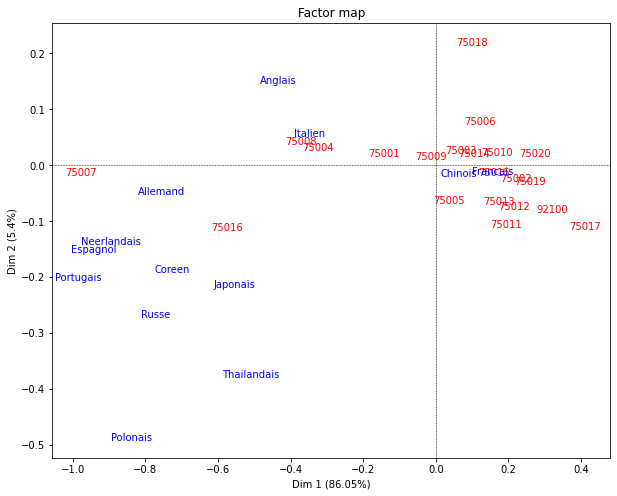

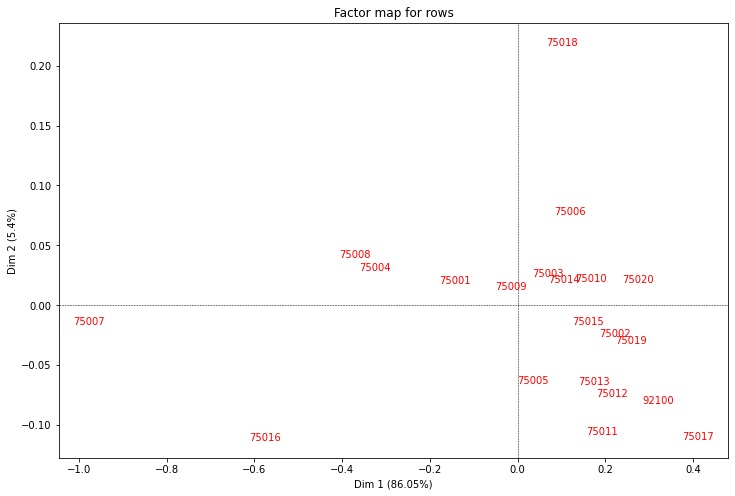

In [36]:
tableau3_ca.fit(X)
# tableau3_ca.plot_eigenvalues()
tableau3_ca.plot_eigenvalues(type="percentage")
# tableau3_ca.plot_eigenvalues(type="cumulative")
# arrondissement en fonction de la langue, poids de chaque composante pour l'arrondissement
print(tableau3_ca.row_contrib_.round(1))
df_rows_3 = tableau3_ca.row_topandas()
tableau3_ca.mapping(1, 2, figsize=(10, 8))
tableau3_ca.mapping_row(num_x_axis=1, num_y_axis=2, figsize=(12, 8))

### analyse
**nuage à gauche** : 7e -> tour Eiffel, 16 -> arc de Triomphe, 8e -> champs-élysées

**nuage à droite** : 13e -> quartier chinois, 3e -> chinois historique

**tas au milieu** : autres -> quartiers plus résidentiels comme 9e, 3e, 14e, 15e, 20e, 19e, 12e

### round 3 : sans les thailandais et les polonais, et le 18e

In [37]:
df3 = df2.copy()
df3.drop(df3[df3["Langue utilisateur"] == 'Polonais'].index, inplace= True)
df3.drop(df3[df3["Langue utilisateur"] == 'Thailandais'].index, inplace= True)
df3.drop(df3[df3["Code postal"] == '75018'].index, inplace= True)

In [38]:
round3 = pd.crosstab(df3['Code postal'], df3["Langue utilisateur"])
X = round3.to_numpy()
round3_ca = CA(row_labels=round3.index.values, col_labels=round3.columns.values)

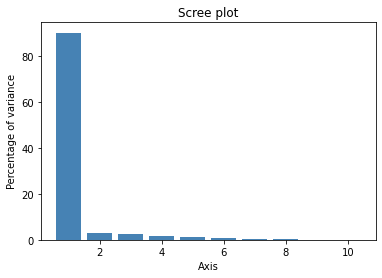

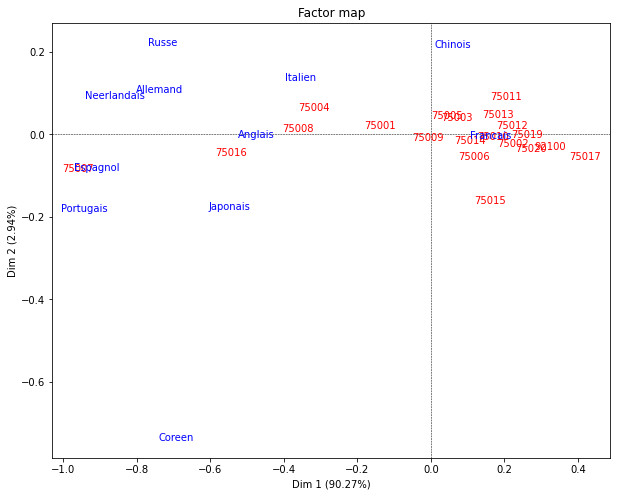

In [39]:
round3_ca.fit(X)
round3_ca.plot_eigenvalues(type="percentage")
round3_ca.mapping(1, 2, figsize=(10, 8))

In [47]:
# arrondissement en fonction de la langue, poids de chaque composante pour l'arrondissement
df_rows = round3_ca.row_topandas()
df_col = round3_ca.col_topandas()
# print(df_rows)
print(df_col)

             col_coord_dim1  col_coord_dim2  col_coord_dim3  col_coord_dim4  \
Allemand               -0.7             0.1             0.1            -0.0   
Anglais                -0.5             0.0             0.1             0.1   
Chinois                 0.1             0.2            -0.4             0.3   
Coreen                 -0.7            -0.7            -0.3             0.3   
Espagnol               -0.9            -0.1            -0.1            -0.1   
Francais                0.2            -0.0            -0.0            -0.0   
Italien                -0.4             0.1             0.1             0.1   
Japonais               -0.5            -0.2            -0.2            -0.2   
Neerlandais            -0.9             0.1            -0.1             0.0   
Portugais              -0.9            -0.2            -0.1            -0.1   
Russe                  -0.7             0.2            -0.2            -0.1   

             col_coord_dim5  col_coord_dim6  col_co

#### analyse
la séparation précedent est encore plus évidente, mais là on tourne en rond si on veut encore plus enlever le coreen qui est beaucoup représenté. il y a le côté  touristique, les chinois très présents dans le 13, et les français un peu partout

### round 4 : sans les français

In [41]:
df_etrangers = df2.copy()
df_etrangers.drop(df_etrangers[df_etrangers["Langue utilisateur"] == 'Francais'].index, inplace= True)
df_etrangers.groupby('Langue utilisateur')["Code postal"].count()

Langue utilisateur
Allemand        21316
Anglais        243480
Chinois         13552
Coreen           3483
Espagnol        38292
Italien         15411
Japonais         4263
Neerlandais      5395
Polonais         3694
Portugais       17618
Russe           28243
Thailandais       422
Name: Code postal, dtype: int64

In [42]:
tableau_etrangers = pd.crosstab(df_etrangers['Code postal'], df_etrangers["Langue utilisateur"])
X = tableau_etrangers.to_numpy()
tableau_etrangers_ca = CA(row_labels=tableau_etrangers.index.values, col_labels=tableau_etrangers.columns.values)

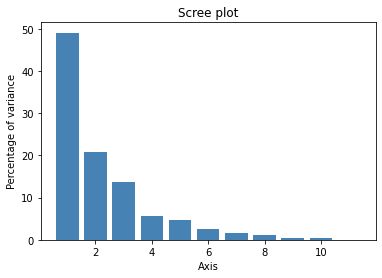

[[ 1.   0.7  2.8  0.3  0.1 10.9  0.6  6.8  1.  12.4  8.7]
 [ 0.   0.4  0.4  0.1  1.3  3.6  1.4  0.4  0.   0.2  1.4]
 [ 1.   1.5  0.   2.3  0.5  4.1  5.   5.3 13.2  4.   8.4]
 [ 4.4  0.2  6.8  5.9 16.8  0.3  4.   6.4  2.4  0.2  5.9]
 [ 0.1  3.   0.  19.7  3.8 13.9  4.6 26.9 12.5  1.1  4.1]
 [ 1.1  0.4  0.4  0.   2.1  0.1  0.2 13.   0.1 11.9  8.8]
 [14.1  3.2  2.9  8.2  6.8  1.2 18.6  2.3  1.2  5.6  0.8]
 [ 1.   0.4  0.3  1.4  3.2  1.8  2.2  0.3  0.  14.3  6.8]
 [ 0.   0.3  0.2  2.4  1.6  1.9  2.4  0.4  8.   0.4  0.5]
 [ 3.2  0.4  0.3  8.1  0.1  2.6  0.1  0.   0.4 11.2 11.3]
 [ 0.1 33.9  0.7 10.2  1.6  1.9 11.   4.5 21.4  0.   0.2]
 [ 0.   1.4  2.4  3.1  1.3  0.6 22.3  4.3  7.7  0.   6. ]
 [ 1.9 36.8  2.8 14.7  0.1  1.   0.2  3.  15.1  2.1  0.3]
 [ 0.8  2.4  1.8  0.   1.6  7.6 15.7  2.3  2.1 24.4  9.9]
 [ 2.   1.3 74.1  8.   2.6  0.6  0.8  0.1  0.8  1.1  1.4]
 [19.5  0.5  1.9  0.7 36.4  0.9  3.4  3.7  0.   0.1  7. ]
 [ 0.2  0.1  0.2  0.2  6.  11.1  4.3  3.4  0.   0.2  8.6]
 [33.5  4.8  1

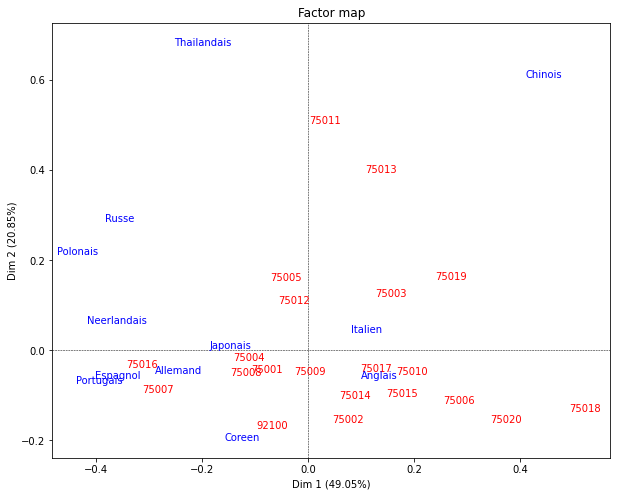

In [43]:
tableau_etrangers_ca.fit(X)
tableau_etrangers_ca.plot_eigenvalues(type="percentage")
# tableau_etrangers.plot_eigenvalues(type="cumulative")
# arrondissement en fonction de la langue, poids de chaque composante pour l'arrondissement
print(tableau_etrangers_ca.row_contrib_.round(1))
df_rows_etrangers = tableau_etrangers_ca.row_topandas()
tableau_etrangers_ca.mapping(1, 2, figsize=(10, 8))

#### analyse
pas beaucoup plus d'informations ; anglais et chinois ont un comportement different des autres touristes ; anglais plus tendance à travailler ici ; beaucoup de français ont leur appareil de travail en anglais aussi

## AFC
### round 1 : code postal vs marque

In [44]:
df_marques = df_projet.copy()
df_marques.drop(df_marques[df_marques["Constructeur appareil"] == 'Autre'].index, inplace= True)
tableau_marques = pd.crosstab(df_marques["Code postal"], df_marques["Constructeur appareil"])
X_marques = tableau_marques.to_numpy()
tableau_marques_ca = CA(row_labels=tableau_marques.index.values, col_labels=tableau_marques.columns.values)

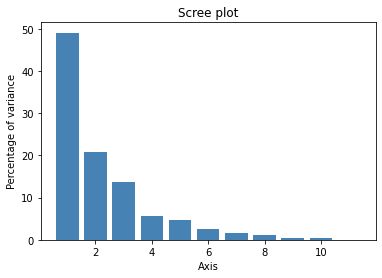

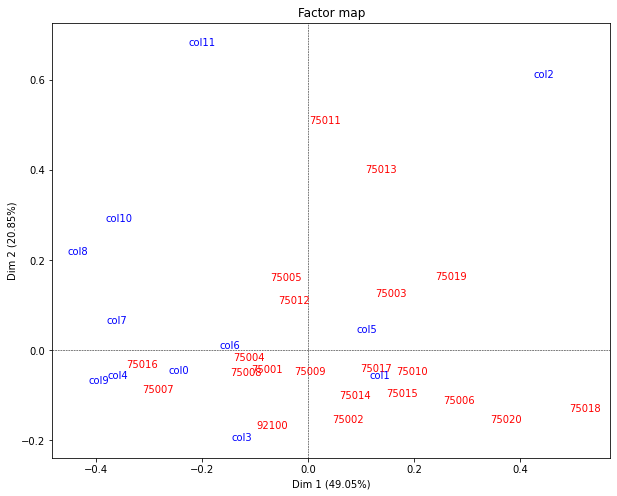

CA(col_labels=array(['ARCHOS', 'Apple', 'Asus', 'HTC', 'HUAWEI', 'LG', 'Nokia', 'RIM',
       'Samsung', 'Sony'], dtype=object),
   row_labels=['75001', '75002', '75003', '75004', '75005', ..., '75017', '75018', '75019', '75020', '92100']
Length: 21
Categories (21, object): ['75001', '75002', '75003', '75004', ..., '75018', '75019', '75020', '92100'])

In [45]:
tableau_marques_ca.fit(X)
tableau_marques_ca.plot_eigenvalues(type="percentage")
df_rows_marques = tableau_marques_ca.row_topandas()
tableau_marques_ca.mapping(num_x_axis=1, num_y_axis=2, figsize=(10, 8))
tableau_marques_ca